# Метод градиентного спуска для одной переменной

это метод оптимизации функций одной или многих переменных. 

**Оптимизация** — в математике, информатике и исследовании операций задача нахождения экстремума (минимума или максимума) целевой функции в некоторой области конечномерного векторного пространства, ограниченной набором линейных и/или нелинейных равенств и/или неравенств.

## Как работает для одной переменной?

Нам необходимо добиться перемещения по оси Х в сторону минимума. Для этого можно использовать проиводную функции. Известно, что знак первой производной позволяет определить где находится точка минимума. Для этого справа от потенциальной точки производная должна иметь положительный знак (возрастать), а слева иметь отрицательный знак (убывать). 

Но при этом, если мы должны двигаться к минимуму и находимся слева от него, то двигаться нам нужно вправо (+). То есть нам нужно брать производную с обратным знаком. Аналогично, если находимся слева (-). 

То есть самую простую формулу для гаридентного спуска можно представить следующим образом.

$ x_{n+1}=x_n - f'(x_n) $

Однако большие значения производных слишком вредят движению (разберём это ниже), чтобы избежать сложностей вводиться поправочный коэффициент $\lambda$

$ x_{n+1}=x_n - \lambda * f'(x_n) $

Этот коэффициент называют скоростью обучения.

# Практическая реализация

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Функции для работы

$f(x) = x^2-6*x+5$

$\frac{\partial f}{\partial x} = f'(x) = 2*x-6 $

$f2(x) = x^2 + sin(x)$

$f2'(x) = 2*x + cos(x) $

In [ ]:
def f(x):
  return x*x - 6*x + 5

def dfdx(x):
  return 2*x - 6

In [ ]:
def f2(x):
  return x*x + 15*np.sin(x)

def df2dx(x):
  return 2*x + 15*np.cos(x)

## Разбор градиентного спуска

In [ ]:
N = 20 #количество итераций
lr = 0.9 #скорость оптимизации

Начальное значение минимумума: 45 в точке -4
Финальное значение минимумума: -3.9934867828206553 в точке 2.9192954946775207


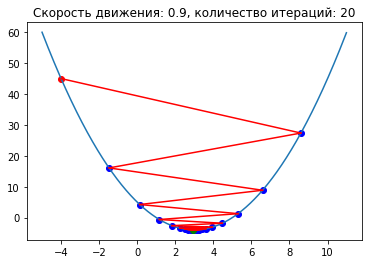

In [ ]:
fig, ax = plt.subplots()
ax.set_title(f'Скорость движения: {lr}, количество итераций: {N}')

x_plot = np.arange(-5, 11, 0.01)
y_plot = [f(x) for x in x_plot]
ax.plot(x_plot, y_plot)


xc = -4 #начальное значение
print(f'Начальное значение минимумума: {f(xc)} в точке {xc}')

ax.scatter(xc, f(xc), c='r')

for _ in range(N):
  x0 = xc #нужно только для графика

  xc = xc - lr*dfdx(xc) #сам по себе градиентный спуск

  ax.scatter(xc, f(xc), c='b') #нужно только для графика
  ax.plot([x0,xc],[f(x0), f(xc)], c='r') #нужно только для графика

ax.scatter(xc, f(xc), c='g')

print(f'Финальное значение минимумума: {f(xc)} в точке {xc}')



plt.show()



## Обёртка градиентного спуска функцией

In [ ]:
def gd(N, lr, min = -5, max = 11, f=f, dfdx=dfdx, xc=-4):
  fig, ax = plt.subplots()
  ax.set_title(f'Скорость движения: {lr}, количество итераций: {N}')

  x_plot = np.arange(min, max, 0.01)
  y_plot = [f(x) for x in x_plot]
  ax.plot(x_plot, y_plot)
  
  print(f'Начальное значение минимумума: {f(xc)} в точке {xc}')

  ax.scatter(xc, f(xc), c='r')

  for _ in range(N):
    x0 = xc #нужно только для графика

    xc = xc - lr*dfdx(xc) #сам по себе градиентный спуск

    ax.scatter(xc, f(xc), c='b') #нужно только для графика
    ax.plot([x0,xc],[f(x0), f(xc)], c='r') #нужно только для графика

  ax.scatter(xc, f(xc), c='g')

  print(f'Финальное значение минимумума: {f(xc)} в точке {xc}')
  plt.show()



Начальное значение минимумума: 45 в точке -4
Финальное значение минимумума: -3.9934867828206553 в точке 2.9192954946775207


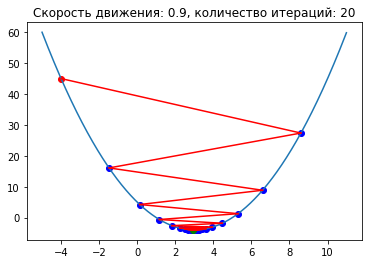

In [ ]:
gd(N, lr, min=-5, max = 11)

## Проверка различных скоростей обучения

Начальное значение минимумума: 45 в точке -4
Финальное значение минимумума: -3.9934867828206553 в точке 2.919295494677521


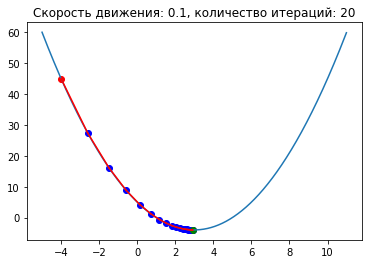

Начальное значение минимумума: 45 в точке -4
Финальное значение минимумума: -3.9999999344992787 в точке 2.9997440689091954


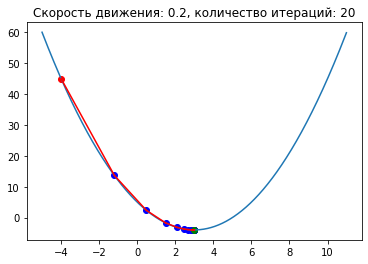

Начальное значение минимумума: 45 в точке -4
Финальное значение минимумума: -3.9999999999999964 в точке 2.999999923034186


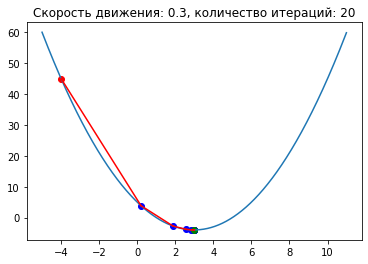

Начальное значение минимумума: 45 в точке -4
Финальное значение минимумума: -3.9999999999999982 в точке 2.9999999999999267


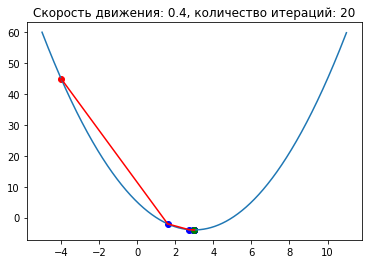

Начальное значение минимумума: 45 в точке -4
Финальное значение минимумума: -4.0 в точке 3.0


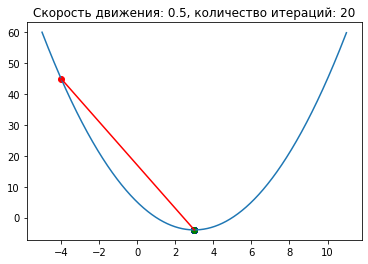

Начальное значение минимумума: 45 в точке -4
Финальное значение минимумума: -3.9999999999999982 в точке 2.9999999999999267


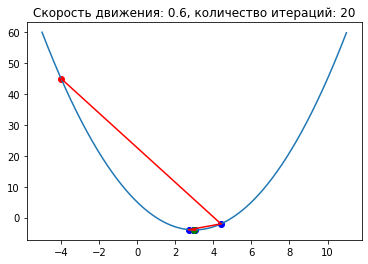

Начальное значение минимумума: 45 в точке -4
Финальное значение минимумума: -3.9999999999999964 в точке 2.999999923034186


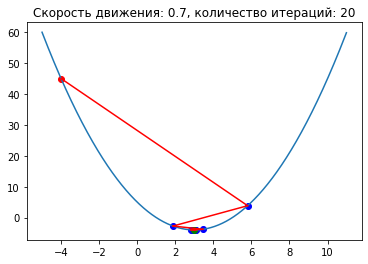

Начальное значение минимумума: 45 в точке -4
Финальное значение минимумума: -3.9999999344992787 в точке 2.9997440689091954


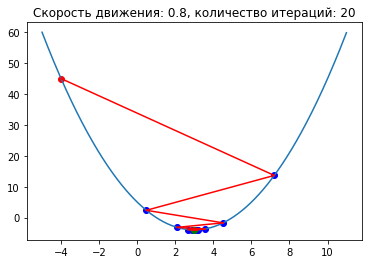

Начальное значение минимумума: 45 в точке -4
Финальное значение минимумума: -3.9934867828206553 в точке 2.9192954946775207


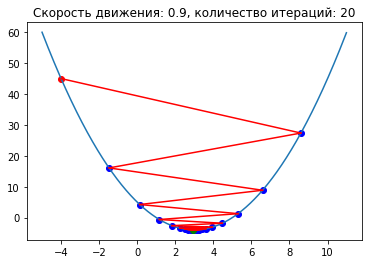

In [ ]:
for i in range(1, 10):
  gd(20, i/10)

Начальное значение минимумума: 45 в точке -4
Финальное значение минимумума: 796335880478.2562 в точке -892373.5351477235


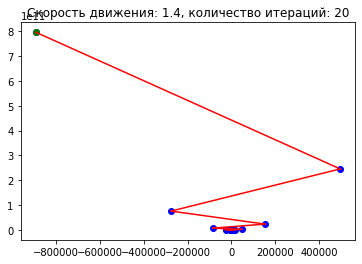

In [ ]:
gd(20, 1.4, -20, 26)

## Сложности оптимизации (локальные минимумы)

Начальное значение минимумума: 91.83968333665945 в точке 10
Финальное значение минимумума: 4.62178832936184 в точке 4.240869994141571


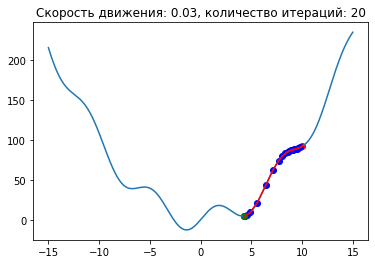

In [ ]:
gd(N, 0.03, min=-15, max= 15, f=f2, dfdx=df2dx, xc=10)

Начальное значение минимумума: 39.38386411994708 в точке -5
Финальное значение минимумума: -12.823616841551932 в точке -1.3851303718795267


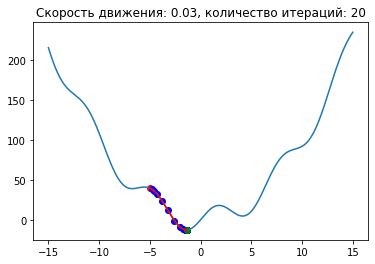

In [ ]:
gd(N, 0.03, min=-15, max= 15, f=f2, dfdx=df2dx, xc=-5)